# manuela CW measurements

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from scipy import constants as const

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge

allSpectra = np.genfromtxt(r"C:\Users\M\Documents\Books\masterprojectinformation\images\2021-07-05ManuelaSQIB.txt", skip_header=2)
percent = [10, 4, 2, 1, 0.5]
ind_percent = [1,2,3,4,5]
wavelengths = allSpectra[:,0]
boolArr = wavelengths < 1000
wavelengths = wavelengths[boolArr]
relTransmissionMain = allSpectra[boolArr,4]

fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,3), dpi = 288)
for ind in [0,1,3]:
    ax.plot(wavelengths, allSpectra[boolArr,ind+1]*100, label = (r"%.1f wt" %percent[ind] + r"\%"))

secax = ax.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E \ / \ eV}$")

ax.set_yscale('log')
ax.set_ylabel('transmission / \%')
ax.set_xlabel('wavelength / nm')
ax.legend(loc = "lower right")
plt.show()

### SQIB (manuela) vs Anthracene

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

allSpectra = np.genfromtxt(r"C:\Users\M\Documents\Books\masterprojectinformation\images\2021-07-05ManuelaSQIB.txt", skip_header=2, usecols=(0,4))

wavelengths = allSpectra[:,0]
boolArr = wavelengths < 1000
wavelengths = wavelengths[boolArr]
relTransmission = allSpectra[boolArr,1]

fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,3), dpi = 288)
ax.plot(wavelengths, relTransmission*100)
ax.set_yscale('log')
ax.set_ylabel('transmission / \%')
ax.set_xlabel('wavelength / nm')
plt.show()

### Red LEDs

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge

allSpectra = np.genfromtxt(r"C:\Users\M\Documents\Books\masterprojectinformation\images\SpectrumRedLEDsforCalibration.txt", skip_header=17, skip_footer=1)

wavelengths = allSpectra[:,0]
boolArr = (wavelengths > 500) & (wavelengths < 800)
emission = allSpectra[:,1]

fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2,2.5), dpi = 288)
ax.plot(wavelengths[boolArr], emission[boolArr]/np.max(emission))
ax.set_ylabel('emission / a.u.')
ax.set_xlabel('wavelength / nm')
ax.set_xticks([500,600,653,700,800],[500,600,653,700,800])

secax = ax.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([653])), 2))
secax.set_xlabel(r"$\mathrm{E \ / \ eV}$")

plt.show()

### Schott Filters

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from matplotlib.ticker import FuncFormatter

filename = r"C:\Users\M\Documents\Books\masterprojectinformation\images\SchottFiltersFromTool.csv"
data = np.genfromtxt(filename, dtype=float, skip_header=6, delimiter=';')
#wavelengths, internal transmission UG5 3 mm, internal transmissiong BG39 3 mm
max_wav = np.argmax(data[:,0]>1000)
wav = data[:max_wav,0]
ug5 = data[:max_wav,1]
bg39 = data[:max_wav,2]

diabatic = lambda t_i: 1-np.log10(np.log10(1/t_i))
fig, ax = plt.subplots(1, 1, figsize=plotHelperLatex.figSizer(1,1.8), dpi=288)
ax.plot(wav, diabatic(ug5), label=r'UG5 (3 mm)', color = 'green')
ax.plot(wav, diabatic(bg39), label=r'BG39 (3 mm)', color = 'blue')
ax.plot(wav, diabatic(ug5*bg39), label=r'UG5 (3 mm) + BG39 (3 mm)', color='black', linestyle="--")
ax.set_ylim((diabatic(5e-6), diabatic(0.95)))
#ax.set_yscale('log')
y_points = np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 1e-2, 1e-3, 1e-4, 1e-5], dtype=float)
ax.set_yticks(diabatic(y_points), y_points)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: "%.2f" %y_points[pos] if y_points[pos] > 1e-3 else "%.0e" %(y_points[pos])))
ax.set_ylabel('internal transmission / 1')
ax.set_xlabel('wavelength / nm')
plt.grid(True)
plt.legend()
plt.show()


### NOPA spectra

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from scipy.signal import find_peaks
aspect = 5

#260 nm
fileUV_noUG5 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\Evaluation_Marker_Gel_Screen\261nm.txt"
fileUV_UG5 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\Evaluation_Marker_Gel_Screen\261nm_UG5.txt"
uv_UG5 = np.genfromtxt(fileUV_UG5, skip_header=17, skip_footer=1)
uv_noUG5 = np.genfromtxt(fileUV_noUG5, skip_header=17, skip_footer=1)
uv_noUG5[:,1] -= np.mean(uv_noUG5[300:600,1])
#300 nm
fileUV2_noUG5 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\Evaluation_Marker_Gel_Screen\300nm05.06.23.txt"
uv2_noUG5 = np.genfromtxt(fileUV2_noUG5, skip_header=17, skip_footer=1)
uv2_noUG5[:,1] -= np.mean(uv2_noUG5[500:700,1])

fileUV3_noUG5 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\370nmSHGout_01.09.2023_1.txt"
uv3_1_noFilter = np.genfromtxt(fileUV3_noUG5, skip_header=17, skip_footer=1)
fileUV3_noUG5 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\370nmSHGout_01.09.2023_2.txt"
uv3_2_noFilter = np.genfromtxt(fileUV3_noUG5, skip_header=17, skip_footer=1)

fileUV4_noFilter = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\470nmSHGout_28.08.txt"
uv4_noFilter = np.genfromtxt(fileUV4_noFilter, skip_header=17, skip_footer=1)


#plots
centroid = 260.8
fwhm = 3.94


fig1, ax1 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,aspect))
split1 = 300
height = np.max(uv_noUG5[:split1,1])*5
ax1.plot(uv_noUG5[:split1,0], uv_noUG5[:split1,1]*10, color = "r", label=r"$\times 10^1$")
ax1.plot(uv_noUG5[split1:,0], uv_noUG5[split1:,1], color = "b", label=r"$\times 10^0$")
#plot SHG FWHM
ax1.plot(np.ones(2)*centroid + np.array([-fwhm,+fwhm])/2, height*np.ones(2), marker="|", color="g")
#ax1.plot(uv_noUG5[peaks1[0], 0], heights1[0]*10, marker="x")
#ax1.plot(uv_UG5[:,0], uv_UG5[:,1])
ax1.set_ylabel(r'intensity / counts')
ax1.set_xlabel('wavelength / nm')
ax1.set_xlim((200,600))
ax1.legend()
#plt.tight_layout()

centroid = 302.46
fwhm = 5.67



fig2, ax2 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,aspect))
split2 = 500
height = np.max(uv2_noUG5[:split2,1])*5
ax2.plot(uv2_noUG5[:split2,0], uv2_noUG5[:split2,1]*10, color = "r", label=r"$\times 10^1$")
ax2.plot(uv2_noUG5[split2:,0], uv2_noUG5[split2:,1], color = "b", label=r"$\times 10^0$")
#plot SHG FWHM
ax2.plot(np.ones(2)*centroid + np.array([-fwhm,+fwhm])/2, height*np.ones(2), marker="|", color="g")
ax2.set_ylabel(r'intensity / counts')
ax2.set_xlabel('wavelength / nm')
ax2.set_xlim((200,700))
ax2.legend()
#plt.tight_layout()

#low int?
centroid = 371.4
fwhm = 5.62
height = 15000/2
#vs fundumantel
#centroid 735 nm
#fwhm 14 nm
#high int?
centroid = 371.02
fwhm = 5.40
height = 12228/2
#fundamental
#centroid 735 nm still
#side heights: 8130 (732 nm), 3750 (749 nm)
#(725) 360 nm to 375 (750) nm
fig3, ax3 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,aspect))
split3 = 0
ax3.plot(uv3_2_noFilter[:,0], uv3_2_noFilter[:,1], color = "b", label=r"$\times 10^0$")
ax3.plot(uv3_1_noFilter[:,0], uv3_1_noFilter[:,1], color = "r", linestyle="dotted", label=r"$\times 10^0$")

#plot SHG FWHM
ax3.plot(np.ones(2)*centroid + np.array([-fwhm,+fwhm])/2, height*np.ones(2), marker="|", color="g")
ax3.set_ylabel(r'intensity / counts')
ax3.set_xlabel('wavelength / nm')
ax3.set_xlim((300,850))
ax3.legend()


centroid = 470.2
fwhm = 5.06
height = 14153/2
fig4, ax4 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,aspect))
ax4.plot(uv4_noFilter[:,0], uv4_noFilter[:,1], color = "r", label=r"$\times 10^0$")
#plot SHG FWHM
#ax2.plot(uv2_noUG5[np.array(np.round([peaks2[0]-widths2[0]/2, peaks2[0]+widths2[0]/2]), dtype=int), 0], np.ones((2))*heights2[0]*5, marker="|")
#print(uv3_noFilter[np.array([int(peaks2[0]-widths2[0]/2), np.ceil(peaks2[0]+widths2[0]/2)], dtype=int), 0])
ax4.plot(np.ones(2)*centroid + np.array([-fwhm,+fwhm])/2, height*np.ones(2), marker="|", color="g")
ax4.set_ylabel(r'intensity / counts')
ax4.set_xlabel('wavelength / nm')
ax4.set_xlim((425,525))
ax4.legend()

plt.show()

[957]
[1053]


(600.0, 750.0)

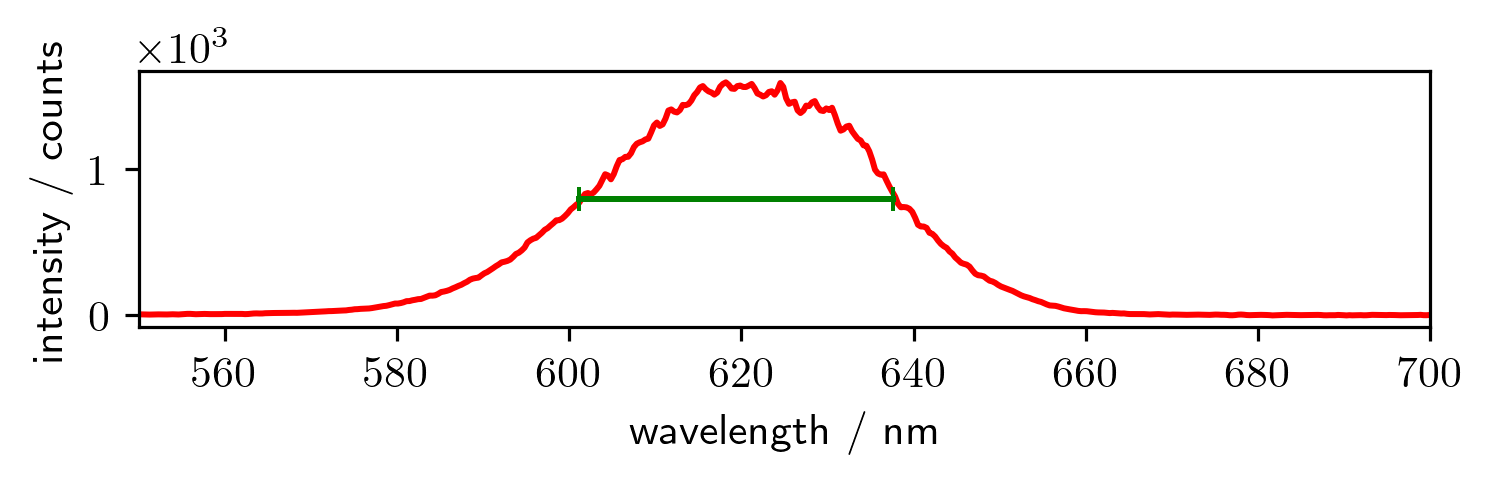

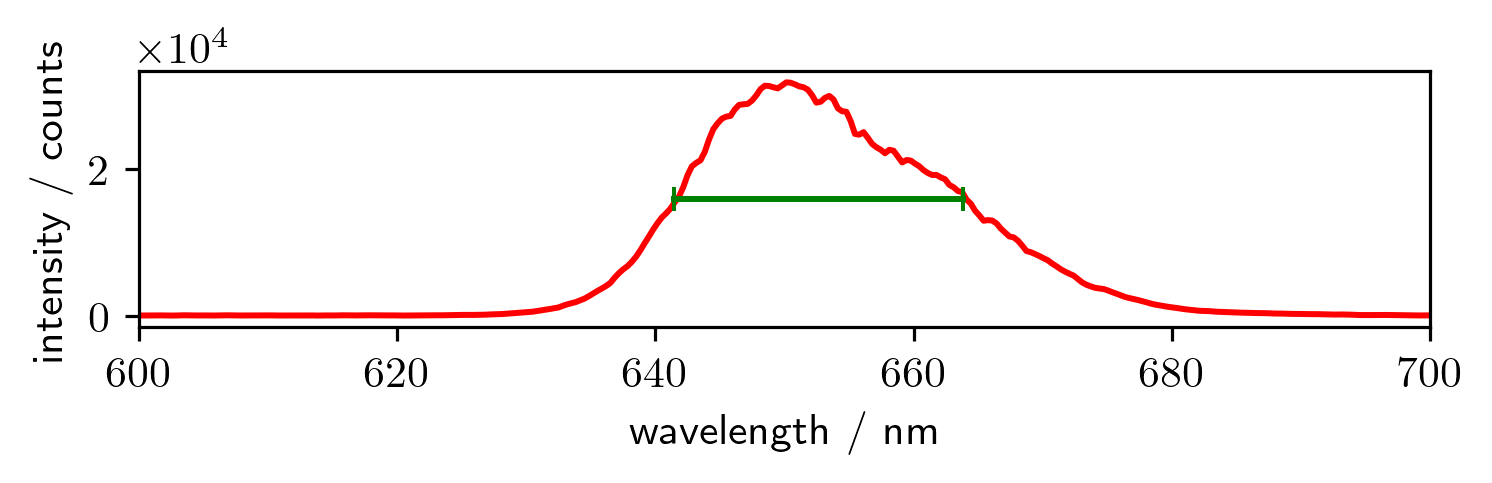

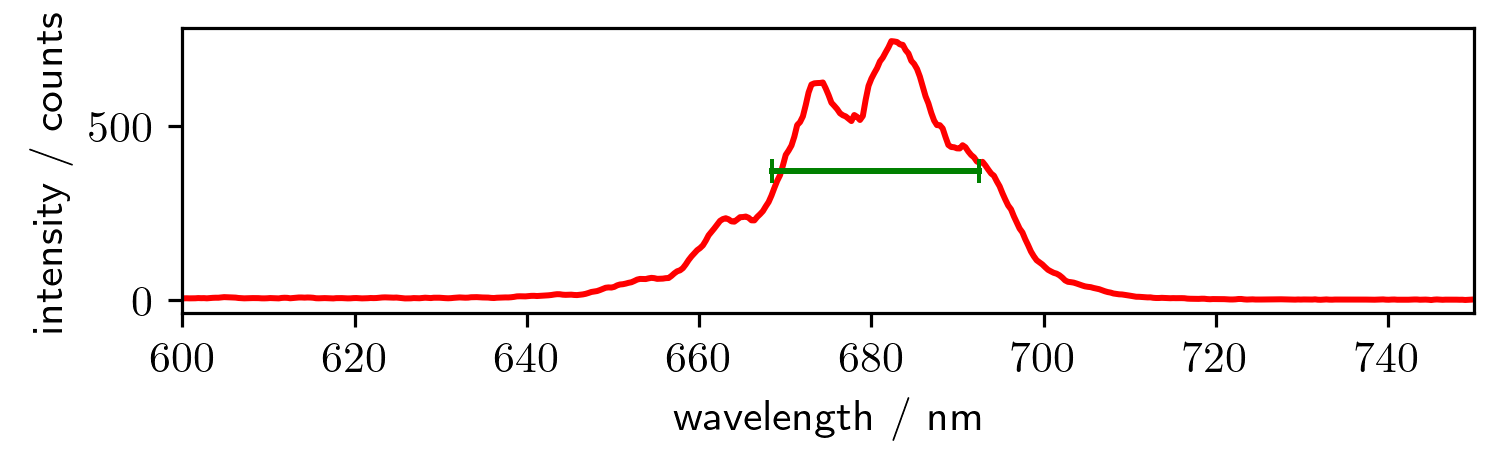

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from scipy.signal import find_peaks

aspect = 5

#620 nm
filveSTD1 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\ActonMonochromatorCharacterisation\Probe620MonochromatorTest20.10.2023.txt"
std1 = np.genfromtxt(filveSTD1, skip_header=23, skip_footer=1)
std1[:,1] -= np.mean(std1[100:200,1])

#650 nm 2H (likely pump spectrum)
#spectrum 198
filestd2 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\2024-02-05\Pump2H_653nm_spec198.txt"
std2 = np.genfromtxt(filestd2, skip_header=23, skip_footer=1)

#680 nm 3H
filestd3 = r"C:\Users\M\Documents\Books\masterprojectinformation\images\spectra\2024-02-05\Probe3H_680nm_last_spectrum.txt"
std3 = np.genfromtxt(filestd3, skip_header=23, skip_footer=1)


peaks3, widths3 = find_peaks(std1[:,1], height = 300, rel_height = 0.5, width=5, distance = 100)
heights3 = widths3['peak_heights']
widths3 = widths3['widths']
#waves
centroid = 619.36
fwhm = 36.50
height3 = 1590.37
print(peaks3)
fig3, ax3 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,aspect))
ax3.plot(std1[:,0], std1[:,1], color = "r")
ax3.plot([centroid-fwhm/2, centroid+fwhm/2], np.ones((2))*heights3[0]/2, marker="|", color = "g")
ax3.set_ylabel(r'intensity / counts')
ax3.set_xlabel('wavelength / nm')
ax3.set_xlim((550,700))

#THIS IS A PUMP MEASUREMENTS
#taken from waves
## max int at 650.20 nm
# centroid 653.63 nm
centroid = 652.63
fwhm = 22.366
peaks4, widths4 = find_peaks(std2[:,1], height = 3000, rel_height = 0.5, width=5, distance = 100)
heights4 = widths4['peak_heights']
widths4 = widths4['widths']
print(peaks4)
fig4, ax4 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,aspect))
ax4.plot(std2[:,0], std2[:,1], color = "r")
ax4.plot([centroid-fwhm/2, centroid+fwhm/2], np.ones((2))*heights4[0]/2, marker="|", color = "g")
ax4.set_ylabel(r'intensity / counts')
ax4.set_xlabel('wavelength / nm')
ax4.set_xlim((600,700))



#taken from waves
#probe 680 nm, with malfunction of spectrometer
#max int = 682.87 nm
centroid = 680.50
fwhm = 24.1
heights5 = max(std3[:,1])
fig5, ax5 = plt.subplots(1,1, dpi=288, figsize = plotHelperLatex.figSizer(1,4.5))
ax5.plot(std3[:,0], std3[:,1], color = "r")
ax5.plot([centroid-fwhm/2, centroid+fwhm/2], np.ones((2))*heights5/2, marker="|", color = "g")
ax5.set_ylabel(r'intensity / counts')
ax5.set_xlabel('wavelength / nm')
ax5.set_xlim((600,750))